# Crop/Pasture Phenology - Start/Maximum/End of Season 

In [1]:
import io
import xarray as xr
import rioxarray as rio
from owslib.wms import WebMapService


def get_img(wms, layer, size):
    return wms.getmap(
        layers=[layer],
        size=size,
        srs="EPSG:4326",
        bbox=wms.contents[layer].boundingBox[:-1],
        format="image/GeoTIFF8")

def get_arrays(url, size=[1200,800]):
    wms = WebMapService(url)
    layers = list(wms.contents)
    
    result = []
    
    for l in layers:
        print(l)
        img = get_img(wms, l, size).read()
        da = rio.open_rasterio(io.BytesIO(img))
        da.name = l
        result.append(da)

    return result

In [2]:
dsets = get_arrays("https://io.apps.fao.org/geoserver/wms/ASIS/PHE/v1")

ds = xr.merge(dsets).squeeze(drop=True)

PHE_S1_EOS_C:ASIS:asis_phe_c_s1
PHE_S2_EOS_C:ASIS:asis_phe_c_s2
PHE_S2_MOS_C:ASIS:asis_phe_c_s2
PHE_S2_SOS_C:ASIS:asis_phe_c_s2
PHE_S2_EOS_P:ASIS:asis_phe_p_s2
PHE_S2_MOS_P:ASIS:asis_phe_p_s2
PHE_S2_SOS_P:ASIS:asis_phe_p_s2
PHE_S1_SOS_C:ASIS:asis_phe_c_s1
PHE_S1_SOS_P:ASIS:asis_phe_p_s1
PHE_S1_MOS_C:ASIS:asis_phe_c_s1
PHE_S1_MOS_P:ASIS:asis_phe_p_s1
PHE_S1_EOS_P:ASIS:asis_phe_p_s1


In [3]:
ds.to_netcdf("phe.nc")

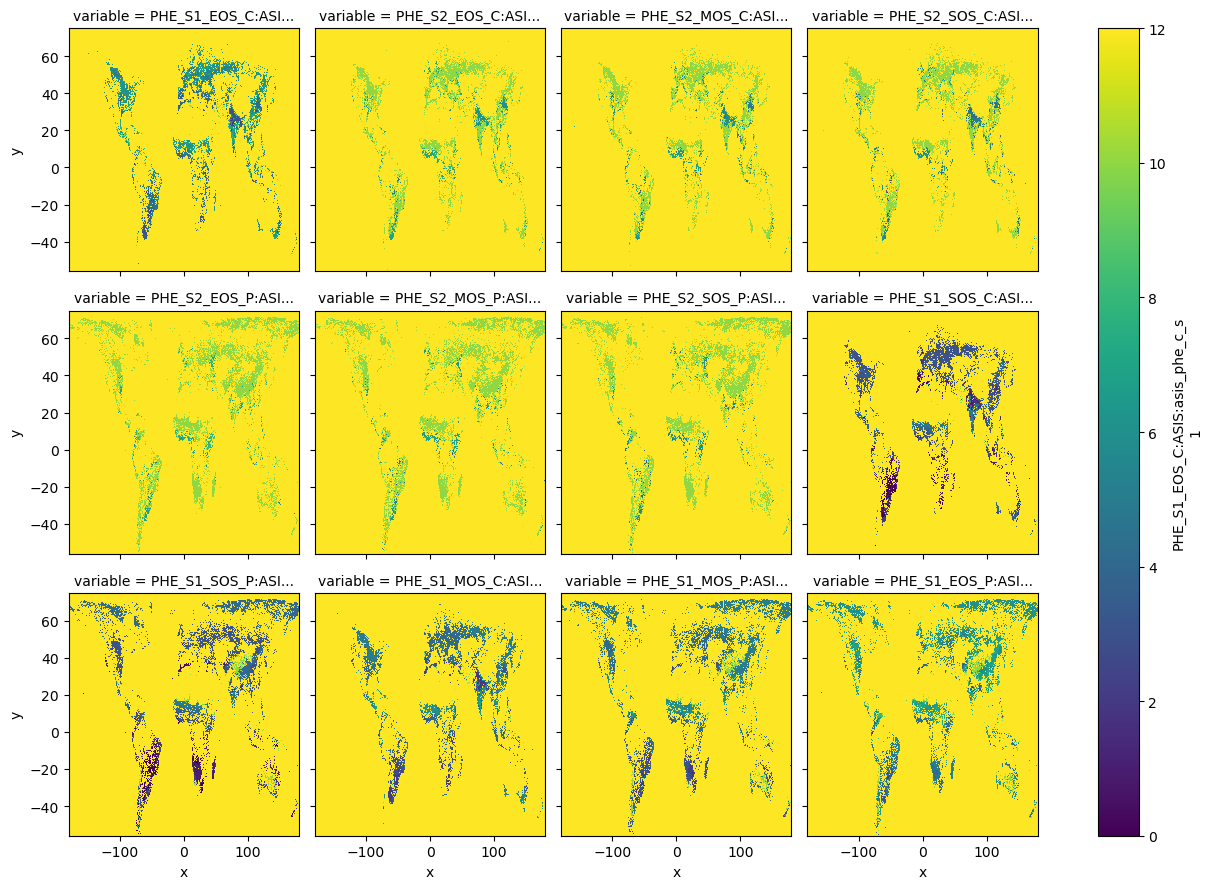

In [4]:
xr.concat([ds[var] for var in ds.data_vars], 
          dim=xr.DataArray(list(ds.data_vars), 
          dims='variable')).plot(col="variable", col_wrap=4)